<a href="https://colab.research.google.com/github/Lucky456F/Tamizan-Skills-Internship-ML-AI-PROJECT-6/blob/main/Project_6_Stock_Price_Prediction_(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance scikit-learn matplotlib tensorflow

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
data = df[['Close']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
sequence_length = 60  # Use 60 days of data to predict the next day
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

# 4. Split into train and test sets
split = int(0.8 * X.shape[0])
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - loss: 0.0178 - val_loss: 0.0035
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0

In [ ]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


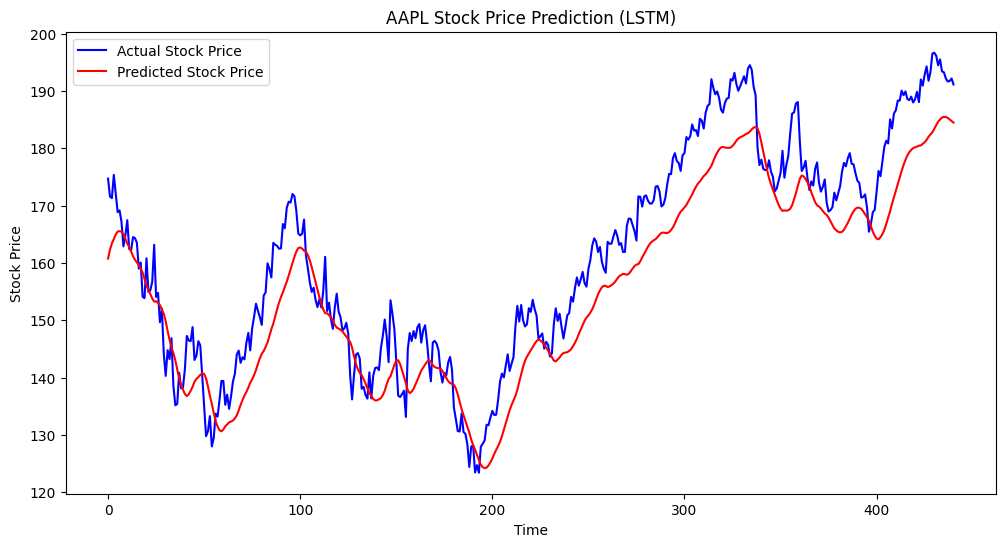

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(real_prices, color='b', label='Actual Stock Price')
plt.plot(predicted_prices, color='r', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

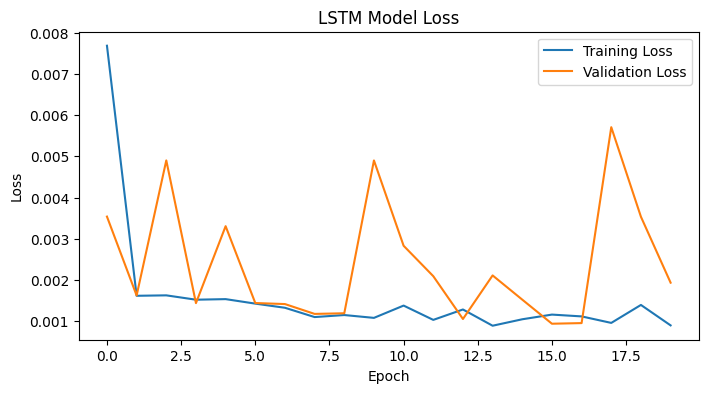

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()